In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

df = pd.read_csv("FuelConsumptionCo2.csv")


In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [15]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
msk= np.random.rand(len(df))<0.8

train= cdf[msk]
test= cdf[~msk]


In [11]:
from sklearn import linear_model
regr= linear_model.LinearRegression()

train_x=np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x,train_y)

print('cofficient :-',regr.coef_)
print('intercept :-', regr.intercept_)

cofficient :- [[9.6259061  8.18673561 9.61041773]]
intercept :- [64.65939367]


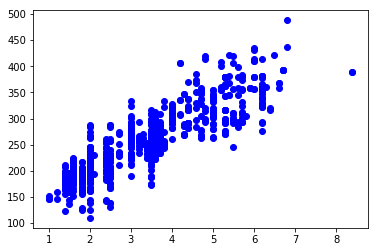

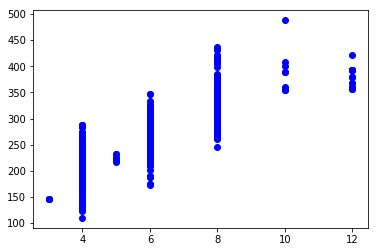

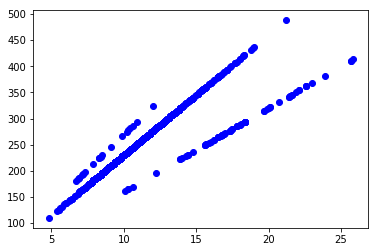

In [17]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.show()
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS, color='blue')
plt.show()
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color='blue')
plt.show()

In [13]:
from sklearn.metrics import r2_score

test_x= np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_hat= regr.predict(test_x)

print('mean absolute error:- ', np.mean(np.absolute(test_y_hat-test_y)))
print('residual sum of square :-', np.mean((test_y_hat-test_y)**2))
print('r2 score:- ',r2_score(test_y_hat,test_y))


mean absolute error:-  17.20096939663521
residual sum of square :- 563.8937066720856
r2 score:-  0.8441115832272008
